<a href="https://colab.research.google.com/github/JonathanMarino/Challenge-Telecom-X/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

## Normalización de columnas

In [3]:
columnas = list(df.columns[2:])
columnas

['customer', 'phone', 'internet', 'account']

In [4]:
columnas_normalizadas = pd.DataFrame()

for columna in columnas:
  columna_normalizada = pd.json_normalize(df[columna])
  columnas_normalizadas = pd.concat([columnas_normalizadas, columna_normalizada], axis=1)

In [5]:
df = pd.concat([df.drop(columns=columnas), columnas_normalizadas], axis=1)

In [6]:
#Para visualizar todas las columnas
pd.set_option('display.max_columns', None)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [8]:
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [9]:
# "Charges.total" tiene cadenas vacias, por este motivo los convertimos a NaN
df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [10]:
columnas_object = df.select_dtypes(include='object').columns.to_list()
columnas_object

['customerID',
 'Churn',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [11]:
# Creamos un DataFrame para visualizar los valores unicos presentes en cada columna object
lista_valores_unicos = []
for col in columnas_object[1:]:
  lista_valores_unicos.append(pd.DataFrame({col: df[col].unique()}))

valores_unicos = pd.concat(lista_valores_unicos, axis=1)
valores_unicos


,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,No,Female,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check
1,Yes,Male,No,No,No,Yes,Fiber optic,Yes,No,Yes,No,No,Yes,Month-to-month,No,Electronic check
2,,NaN,NaN,NaN,NaN,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,NaN,Credit card (automatic)
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bank transfer (automatic)


In [12]:
# Notamos que "Churn" tiene registros en blanco
(df['Churn'] == '').sum()

np.int64(224)

In [13]:
df[df['Churn'] == '']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,No,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


In [14]:
# Convertimos los datos vacios en NaN
df['Churn'] = df['Churn'].replace('', np.nan)


## Tratamiento de datos nulos

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [16]:
df.dropna(subset=['Churn'], inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [18]:
# Creemos que 'Charges.Monthly' * 'tenure' es un calculo logico para estimar los valores faltantes de la columna 'Charges.Total'
df.loc[df['Charges.Total'].isna(), 'Charges.Total'] = (df['tenure'] * df['Charges.Monthly'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [20]:
"""
Notamos la presencia de algunos registros con valor 0 en "Charges.Total" y "tenure". Entendemos que son clientes nuevos que no tienen ni un mes
de permanencia en la empresa. Por lo tanto le asignamos el valor de "Charges.Monthly" a la columna "Charges.Total"
"""
df.loc[(df['Charges.Total'] == 0) & (df['tenure'] == 0), 'Charges.Total'] = df['Charges.Monthly']

In [21]:
# Comprobar si hay datos duplicados
df.duplicated().any()

np.False_

In [22]:
df[columnas_object[1:]] = df[columnas_object[1:]].apply(lambda x: x.str.lower())
df.head(1)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.3


## Renombramos las columnas

In [23]:
df.columns = df.columns.map({'customerID' : 'Cliente_ID', 'Churn': 'Abandono' , 'gender' : 'Genero', 'SeniorCitizen' : 'Ciudadano_mayor', 'Partner' : 'Pareja',
                'Dependents' : 'Dependientes', 'tenure' : 'Meses_permanencia', 'PhoneService' : 'Servicio_telefonico', 'MultipleLines' : 'Varias_lineas',
                'InternetService': 'Tipo_servicio_internet', 'OnlineSecurity' : 'Seguridad_en_linea', 'OnlineBackup' : 'Copia_seguridad_en_linea',
                'DeviceProtection' : 'Proteccion_dispositivo', 'TechSupport' : 'Soporte_tecnico', 'StreamingTV' : 'Televisión_por_cable',
                'StreamingMovies' : 'Streaming_peliculas', 'Contract' : 'Tipo_contrato', 'PaperlessBilling' : 'Factura_en_linea',
                'PaymentMethod' : 'Forma_pago', 'Charges.Monthly' : 'Cuenta_mensual', 'Charges.Total' : 'Cargo_total'})

## Estandarización de datos:
Convertimos valores textuales como "Sí" y "No" en valores binarios (1 y 0)

In [80]:
columnas_binarias = ['Abandono', 'Pareja', 'Dependientes', 'Servicio_telefonico', 'Factura_en_linea']
df[columnas_binarias] = df[columnas_binarias].replace({'yes' : 1, 'no' : 0}).infer_objects(copy=False).astype('Int64')

In [81]:
df['Genero'] = df['Genero'].replace({'male' : 0, 'female' : 1}).infer_objects(copy=False).astype('Int64')

In [26]:
# En esta variable guardamos los nombres de aquellas columnas que tienen en algunos de sus registros el valor textual "no internet service"
columnas_a_convertir = [col for col in df.columns if (df[col] == 'no internet service').any()]

In [27]:
columnas_a_convertir

['Seguridad_en_linea',
 'Copia_seguridad_en_linea',
 'Proteccion_dispositivo',
 'Soporte_tecnico',
 'Televisión_por_cable',
 'Streaming_peliculas']

In [82]:
# 'no internet service' es igual a 'no', por lo tanto igual a 0
df[columnas_a_convertir]  = df[columnas_a_convertir].replace({'yes' : 1, 'no' : 0, 'no internet service' : 0 }).infer_objects(copy=False)

In [83]:
df['Varias_lineas'] = df['Varias_lineas'].replace({'yes' : 1, 'no' : 0, 'no phone service' : 0 }).infer_objects(copy=False)

In [30]:
df['Tipo_servicio_internet'].unique()

array(['dsl', 'fiber optic', 'no'], dtype=object)

In [84]:
# Creamos la columna "Servicio_internet" para indicar unicamente si tiene o no contratado este servicio, independientemente del tipo contratado
df['Servicio_internet'] = df['Tipo_servicio_internet'].replace({'dsl' : 1, 'fiber optic' : 1, 'no' : 0}).infer_objects(copy=False)

In [32]:
df['Tipo_servicio_internet'] =df['Tipo_servicio_internet'].replace('no','no internet service' )

In [33]:
df.columns

Index(['Cliente_ID', 'Abandono', 'Genero', 'Ciudadano_mayor', 'Pareja',
       'Dependientes', 'Meses_permanencia', 'Servicio_telefonico',
       'Varias_lineas', 'Tipo_servicio_internet', 'Seguridad_en_linea',
       'Copia_seguridad_en_linea', 'Proteccion_dispositivo', 'Soporte_tecnico',
       'Televisión_por_cable', 'Streaming_peliculas', 'Tipo_contrato',
       'Factura_en_linea', 'Forma_pago', 'Cuenta_mensual', 'Cargo_total',
       'Servicio_internet'],
      dtype='object')

## Creamos la columna "Cuentas_diarias"

In [34]:
df['Cuentas_diarias'] = df['Cuenta_mensual'] / 30
df.head(2)

,Cliente_ID,Abandono,Genero,Ciudadano_mayor,Pareja,Dependientes,Meses_permanencia,Servicio_telefonico,Varias_lineas,Tipo_servicio_internet,Seguridad_en_linea,Copia_seguridad_en_linea,Proteccion_dispositivo,Soporte_tecnico,Televisión_por_cable,Streaming_peliculas,Tipo_contrato,Factura_en_linea,Forma_pago,Cuenta_mensual,Cargo_total,Servicio_internet,Cuentas_diarias
0,0002-ORFBO,0,1,0,1,1,9,1,0,dsl,0,1,0,1,1,0,one year,1,mailed check,65.6,593.3,1,2.186667
1,0003-MKNFE,0,0,0,0,0,9,1,1,dsl,0,0,0,0,0,1,month-to-month,0,mailed check,59.9,542.4,1,1.996667


## Modificamos el orden de las columnas

In [35]:
nuevo_orden = ['Cliente_ID', 'Abandono', 'Genero', 'Ciudadano_mayor', 'Pareja', 'Dependientes', 'Meses_permanencia', 'Servicio_telefonico', 'Varias_lineas', 'Servicio_internet',
               'Tipo_servicio_internet', 'Seguridad_en_linea', 'Copia_seguridad_en_linea', 'Proteccion_dispositivo', 'Soporte_tecnico', 'Televisión_por_cable',
               'Streaming_peliculas', 'Tipo_contrato', 'Factura_en_linea', 'Forma_pago', 'Cuentas_diarias', 'Cuenta_mensual', 'Cargo_total']

In [36]:
df = df.reindex(columns=nuevo_orden)

In [37]:
df.head(1)

,Cliente_ID,Abandono,Genero,Ciudadano_mayor,Pareja,Dependientes,Meses_permanencia,Servicio_telefonico,Varias_lineas,Servicio_internet,Tipo_servicio_internet,Seguridad_en_linea,Copia_seguridad_en_linea,Proteccion_dispositivo,Soporte_tecnico,Televisión_por_cable,Streaming_peliculas,Tipo_contrato,Factura_en_linea,Forma_pago,Cuentas_diarias,Cuenta_mensual,Cargo_total
0,0002-ORFBO,0,1,0,1,1,9,1,0,1,dsl,0,1,0,1,1,0,one year,1,mailed check,2.186667,65.6,593.3


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Cliente_ID                7043 non-null   object 
 1   Abandono                  7043 non-null   Int64  
 2   Genero                    7043 non-null   Int64  
 3   Ciudadano_mayor           7043 non-null   int64  
 4   Pareja                    7043 non-null   Int64  
 5   Dependientes              7043 non-null   Int64  
 6   Meses_permanencia         7043 non-null   int64  
 7   Servicio_telefonico       7043 non-null   Int64  
 8   Varias_lineas             7043 non-null   int64  
 9   Servicio_internet         7043 non-null   int64  
 10  Tipo_servicio_internet    7043 non-null   object 
 11  Seguridad_en_linea        7043 non-null   int64  
 12  Copia_seguridad_en_linea  7043 non-null   int64  
 13  Proteccion_dispositivo    7043 non-null   int64  
 14  Soporte_tecni

#📊 Carga y análisis

In [39]:
df.describe()

,Abandono,Genero,Ciudadano_mayor,Pareja,Dependientes,Meses_permanencia,Servicio_telefonico,Varias_lineas,Servicio_internet,Seguridad_en_linea,Copia_seguridad_en_linea,Proteccion_dispositivo,Soporte_tecnico,Televisión_por_cable,Streaming_peliculas,Factura_en_linea,Cuentas_diarias,Cuenta_mensual,Cargo_total
count,7043.0,7043.0,7043.000000,7043.0,7043.0,7043.000000,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.0,7043.000000,7043.000000,7043.000000
mean,0.26537,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.783331,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,2.158723,64.761692,2279.798992
std,0.441561,0.500013,0.368612,0.499748,0.45811,24.559481,0.295752,0.493888,0.412004,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,1.003002,30.090047,2266.730170
min,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.608333,18.250000,18.800000
25%,0.0,0.0,0.000000,0.0,0.0,9.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.183333,35.500000,398.550000
50%,0.0,0.0,0.000000,0.0,0.0,29.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.345000,70.350000,1394.550000
75%,1.0,1.0,0.000000,1.0,1.0,55.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,2.995000,89.850000,3786.600000
max,1.0,1.0,1.000000,1.0,1.0,72.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,3.958333,118.750000,8684.800000


### Distribución de evasión

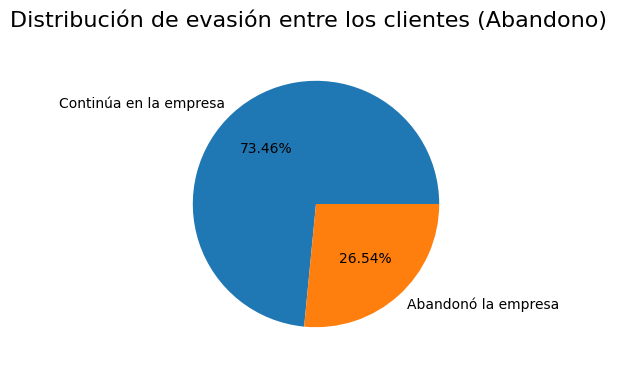

In [72]:
contador_abandono = df['Abandono'].value_counts()

fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribución de evasión entre los clientes (Abandono)', fontsize=16)
ax.pie(contador_abandono, labels=['Continúa en la empresa', 'Abandonó la empresa'], autopct='%0.2f%%')
plt.show()

## Tasas de abandono promedio

### Tasas de abandono por variables categóricas

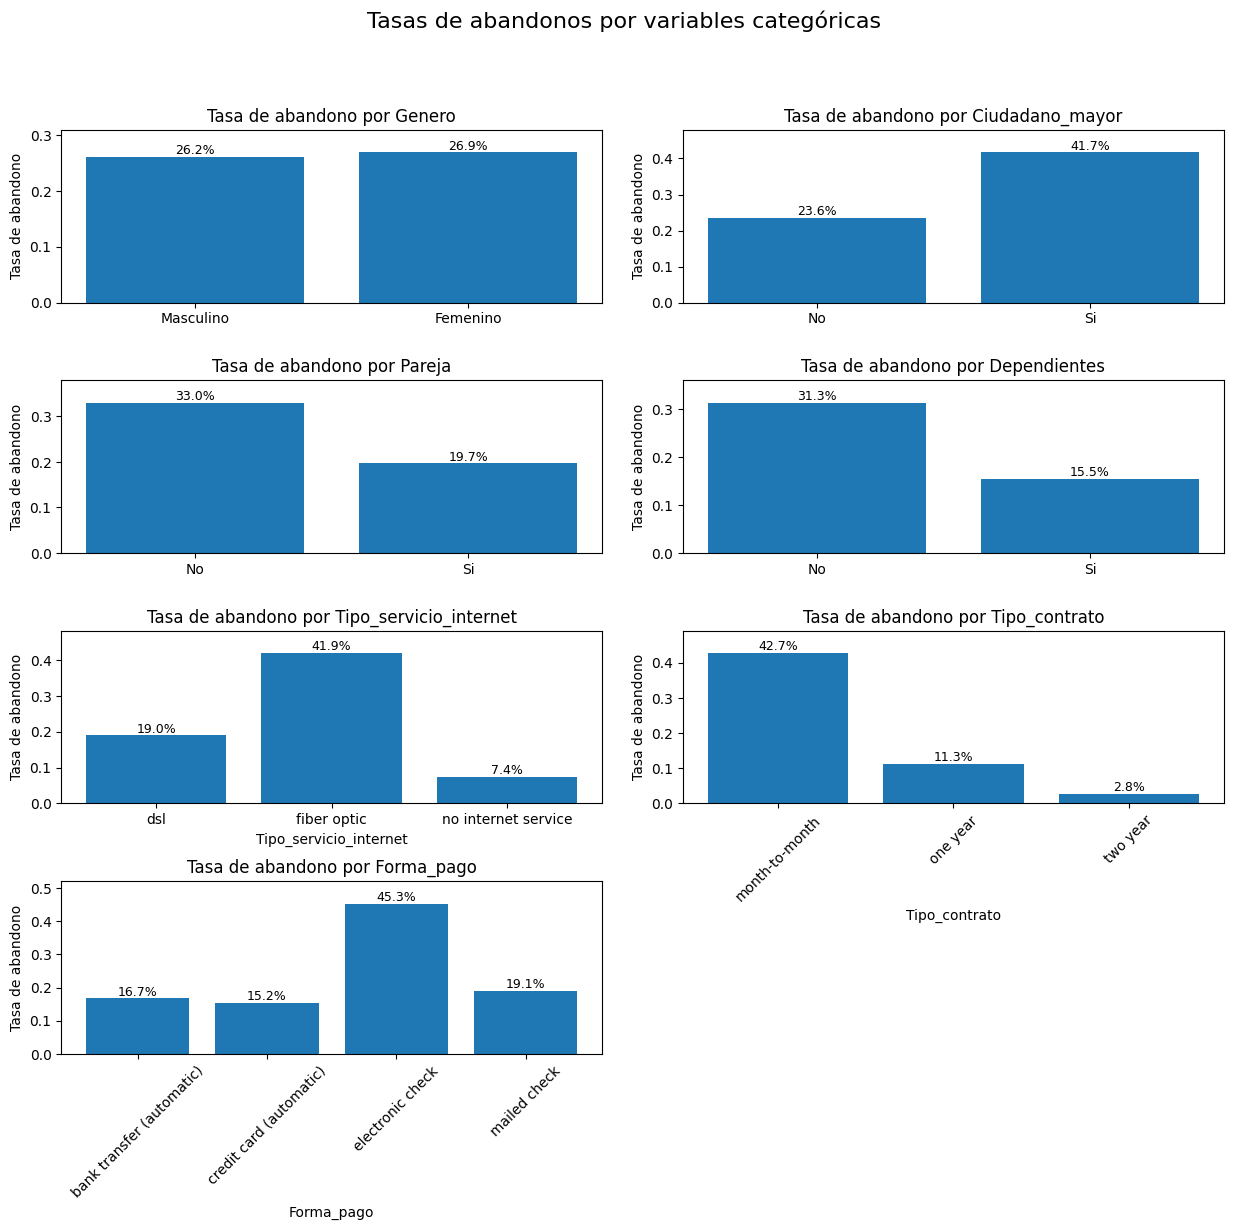

In [41]:
fig, ax = plt.subplots(4,2, figsize=(15,12))
fig.suptitle('Tasas de abandonos por variables categóricas', fontsize=16)
fig.subplots_adjust(wspace=0.15, hspace=0.45)
lista_columnas_categoricas = ['Genero', 'Ciudadano_mayor', 'Pareja', 'Dependientes', 'Tipo_servicio_internet', 'Tipo_contrato', 'Forma_pago']

ax = ax.flatten()

for i, col in enumerate(lista_columnas_categoricas):
  promedio = df.groupby(col)['Abandono'].mean()

  bars = ax[i].bar(promedio.index, promedio.values)

  for bar in bars:
    altura = bar.get_height()
    ax[i].text(
        bar.get_x() + bar.get_width() / 2,
        altura,
        f'{altura*100:.1f}%',
        ha='center', va='bottom',
        fontsize=9
    )

  max_val = promedio.values.max()
  ax[i].set_ylim(0, max_val * 1.15)

  ax[i].set_title(f'Tasa de abandono por {col}')
  if i in [1,2,3]:
    ax[i].set_xticks([0, 1])
    ax[i].set_xticklabels(['No', 'Si'])
  elif i == 0:
    ax[i].set_xticks([0, 1])
    ax[i].set_xticklabels(['Masculino', 'Femenino'])
  else:
    ax[i].set_xlabel(col)
  ax[i].set_ylabel('Tasa de abandono')

ax[5].tick_params(axis='x', rotation = 45)
ax[6].tick_params(axis='x', rotation = 45)

fig.delaxes(ax[-1])

plt.show()


### Tabla resumen por categórias

In [42]:
resumen_categorias = {}
for col in lista_columnas_categoricas:
  resumen_categorias[col] = df.groupby(col)['Abandono'].agg(
    clientes='count',
    abandonos='sum',
    tasa_abandono='mean'
  )
resumen_categorias['Genero'].rename(index={0: 'Masculino', 1: 'Femenino'}, inplace=True)

for i in ['Ciudadano_mayor', 'Pareja', 'Dependientes']:
  resumen_categorias[i].rename(index={0: 'No', 1: 'Si'}, inplace=True)

df_categorias_resumen = (
    pd.concat(resumen_categorias, names=['categoria', 'valor'])
      .reset_index()
)


estilo_resumen_categorias = df_categorias_resumen.sort_values('tasa_abandono', ascending=False).style.format({'tasa_abandono': '{:.1%}'}).background_gradient(subset=['tasa_abandono'], cmap='Reds')
estilo_resumen_categorias


,categoria,valor,clientes,abandonos,tasa_abandono
16,Forma_pago,electronic check,2365,1071,45.3%
11,Tipo_contrato,month-to-month,3875,1655,42.7%
9,Tipo_servicio_internet,fiber optic,3096,1297,41.9%
3,Ciudadano_mayor,Si,1142,476,41.7%
4,Pareja,No,3641,1200,33.0%
6,Dependientes,No,4933,1543,31.3%
1,Genero,Femenino,3488,939,26.9%
0,Genero,Masculino,3555,930,26.2%
2,Ciudadano_mayor,No,5901,1393,23.6%
5,Pareja,Si,3402,669,19.7%


### Principales diferencias de tasas de abandono entre los valores de misma categoría

In [43]:
diferencia_tasa_var_categorias = {
    'Categoria' : ['Ciudadano_mayor', 'Tipo_servicio_internet', 'Tipo_contrato', 'Tipo_contrato', 'Forma_pago', 'Forma_pago', 'Forma_pago'],
    'Valor' : ['>= 65 años', 'Fibra optica vs dsl', 'Mes a Mes vs 1 año', 'Mes a Mes vs 2 años', 'E-cheq vs Mailed check', 'E-cheq vs bank transfer', 'E-cheq vs credit card'],
    'Diferencia absoluta' : [(df_categorias_resumen.loc[3, 'tasa_abandono'] - df_categorias_resumen.loc[2, 'tasa_abandono'])*100,
                             (df_categorias_resumen.loc[9, 'tasa_abandono'] - df_categorias_resumen.loc[8, 'tasa_abandono'])*100,
                             (df_categorias_resumen.loc[11, 'tasa_abandono'] - df_categorias_resumen.loc[12, 'tasa_abandono'])*100,
                             (df_categorias_resumen.loc[11, 'tasa_abandono'] - df_categorias_resumen.loc[13, 'tasa_abandono'])*100,
                             (df_categorias_resumen.loc[16, 'tasa_abandono'] - df_categorias_resumen.loc[17, 'tasa_abandono'])*100,
                             (df_categorias_resumen.loc[16, 'tasa_abandono'] - df_categorias_resumen.loc[14, 'tasa_abandono'])*100,
                             (df_categorias_resumen.loc[16, 'tasa_abandono'] - df_categorias_resumen.loc[15, 'tasa_abandono'])*100
                             ],
    'Riesgo Relativo' : [((df_categorias_resumen.loc[3, 'tasa_abandono'] / df_categorias_resumen.loc[2, 'tasa_abandono'])-1)*100,
                         ((df_categorias_resumen.loc[9, 'tasa_abandono'] / df_categorias_resumen.loc[8, 'tasa_abandono'])-1)*100,
                         ((df_categorias_resumen.loc[11, 'tasa_abandono'] / df_categorias_resumen.loc[12, 'tasa_abandono'] )-1)*100,
                         ((df_categorias_resumen.loc[11, 'tasa_abandono'] / df_categorias_resumen.loc[13, 'tasa_abandono'] )-1)*100,
                         ((df_categorias_resumen.loc[16, 'tasa_abandono'] / df_categorias_resumen.loc[17, 'tasa_abandono'] )-1)*100,
                         ((df_categorias_resumen.loc[16, 'tasa_abandono'] / df_categorias_resumen.loc[14, 'tasa_abandono'] )-1)*100,
                         ((df_categorias_resumen.loc[16, 'tasa_abandono'] / df_categorias_resumen.loc[15, 'tasa_abandono'] )-1)*100

                             ],
}

df_diferencia_tasa_var_categorias = pd.DataFrame(diferencia_tasa_var_categorias)
df_diferencia_tasa_var_categorias.style.format({'Diferencia absoluta' : '{:.2f} pp',
                                                'Riesgo Relativo' : '{:.2f}%'}).highlight_between(left=50, right=1500, subset=['Riesgo Relativo'], color='Blue').hide(axis='index')



Categoria,Valor,Diferencia absoluta,Riesgo Relativo
Ciudadano_mayor,>= 65 años,18.08 pp,76.57%
Tipo_servicio_internet,Fibra optica vs dsl,22.93 pp,120.96%
Tipo_contrato,Mes a Mes vs 1 año,31.44 pp,278.98%
Tipo_contrato,Mes a Mes vs 2 años,39.88 pp,1408.19%
Forma_pago,E-cheq vs Mailed check,26.18 pp,137.01%
Forma_pago,E-cheq vs bank transfer,28.58 pp,171.01%
Forma_pago,E-cheq vs credit card,30.04 pp,197.09%


### Tasas de abandono por servicios



In [44]:
col_servicios = ['Servicio_telefonico', 'Varias_lineas', 'Servicio_internet', 'Seguridad_en_linea', 'Copia_seguridad_en_linea', 'Proteccion_dispositivo', 'Soporte_tecnico', 'Televisión_por_cable', 'Streaming_peliculas']

In [45]:
col_servicios

['Servicio_telefonico',
 'Varias_lineas',
 'Servicio_internet',
 'Seguridad_en_linea',
 'Copia_seguridad_en_linea',
 'Proteccion_dispositivo',
 'Soporte_tecnico',
 'Televisión_por_cable',
 'Streaming_peliculas']

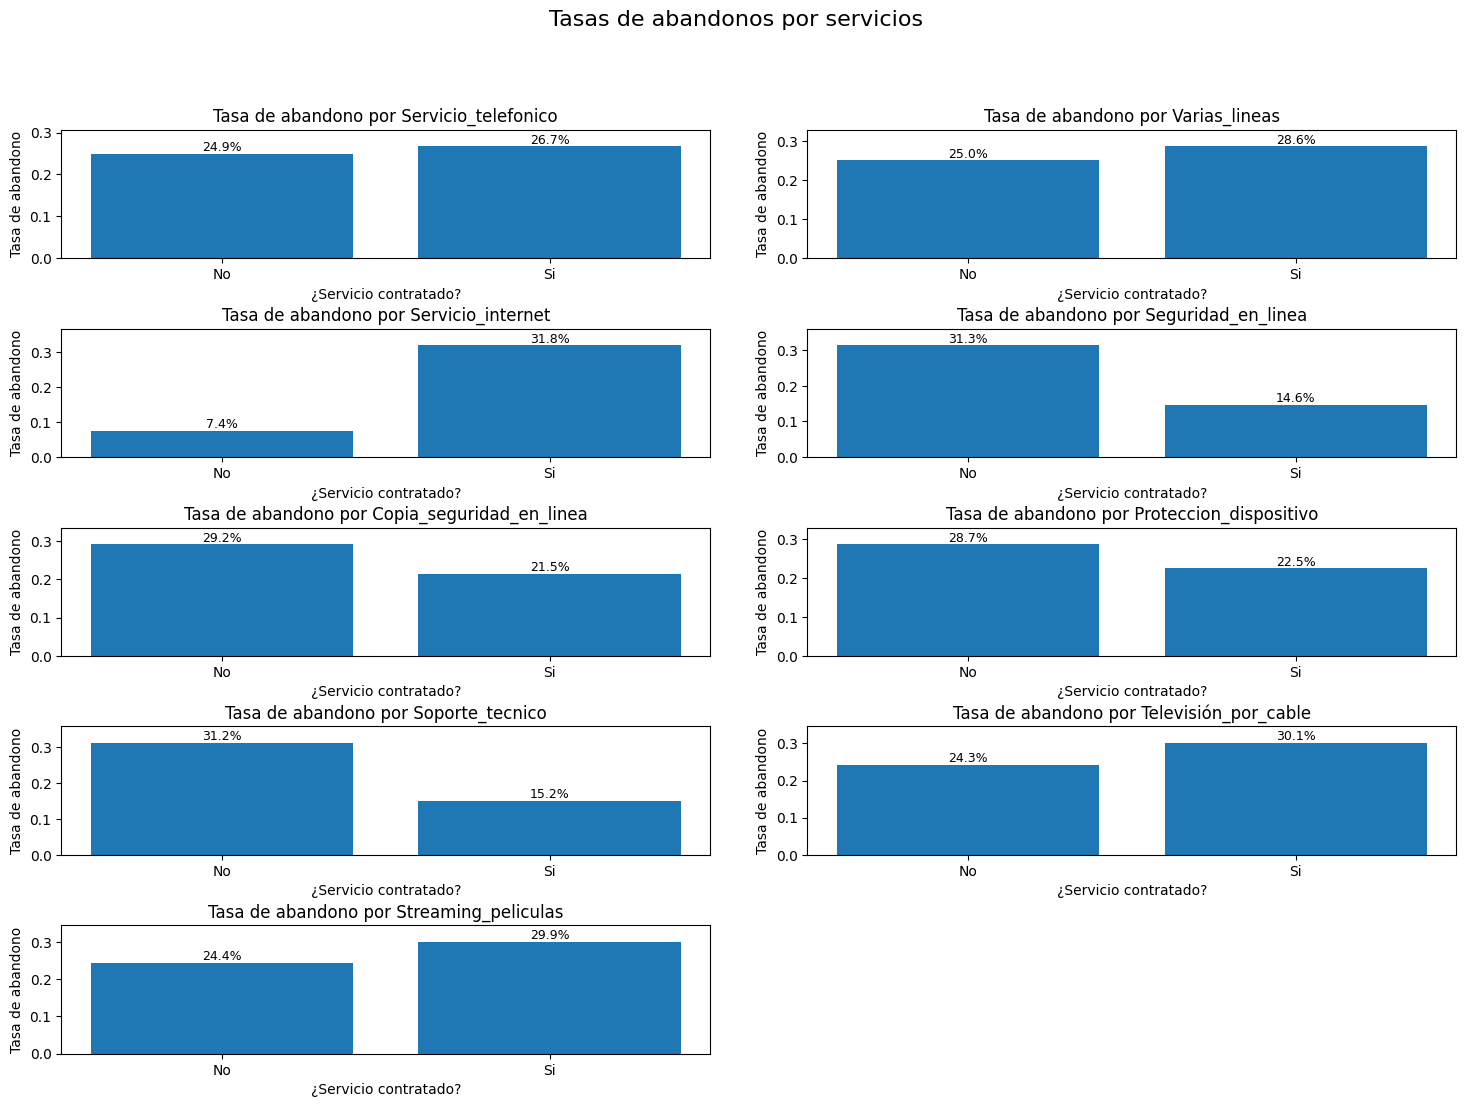

In [46]:
fig, ax = plt.subplots(5,2, figsize=(18,12))
fig.suptitle('Tasas de abandonos por servicios', fontsize=16)
fig.subplots_adjust(wspace=0.15, hspace=0.55)

ax = ax.flatten()

for i, col in enumerate(col_servicios):
  promedio = df.groupby(col)['Abandono'].mean()

  bars = ax[i].bar(promedio.index, promedio.values)

  for bar in bars:
    altura = bar.get_height()
    ax[i].text(
        bar.get_x() + bar.get_width() / 2,
        altura,
        f'{altura*100:.1f}%',
        ha='center', va='bottom',
        fontsize=9
    )

  max_val = promedio.values.max()
  ax[i].set_ylim(0, max_val * 1.15)

  ax[i].set_title(f'Tasa de abandono por {col}')

  ax[i].set_xticks([0, 1])
  ax[i].set_xticklabels(['No', 'Si'])

  ax[i].set_ylabel('Tasa de abandono')
  ax[i].set_xlabel('¿Servicio contratado?')

fig.delaxes(ax[-1])

plt.show()


### Tabla resumen por servicios

In [47]:
resumen_servicios = {}
for col in col_servicios:
  resumen_servicios[col] = df.groupby(col)['Abandono'].agg(
    clientes='count',
    abandonos='sum',
    tasa_abandono='mean'
  )

for i in col_servicios:
  resumen_servicios[i].rename(index={0: 'No', 1: 'Si'}, inplace=True)

df_servicios_resumen = (
    pd.concat(resumen_servicios, names=['Servicio', 'Incluido en el plan'])
      .reset_index()
)

estilo_resumen_servicios = (df_servicios_resumen
                            .sort_values('tasa_abandono', ascending=False)
                            .style
                            .format({'tasa_abandono':'{:.1%}'})
                            .background_gradient(subset=['tasa_abandono'], cmap='Reds')
                            .hide(axis='index'))


estilo_resumen_servicios

Servicio,Incluido en el plan,clientes,abandonos,tasa_abandono
Servicio_internet,Si,5517,1756,31.8%
Seguridad_en_linea,No,5024,1574,31.3%
Soporte_tecnico,No,4999,1559,31.2%
Televisión_por_cable,Si,2707,814,30.1%
Streaming_peliculas,Si,2732,818,29.9%
Copia_seguridad_en_linea,No,4614,1346,29.2%
Proteccion_dispositivo,No,4621,1324,28.7%
Varias_lineas,Si,2971,850,28.6%
Servicio_telefonico,Si,6361,1699,26.7%
Varias_lineas,No,4072,1019,25.0%


### Principales diferencias de tasas de abandono entre los valores del mismo servicio

In [79]:
diferencia_tasa_servicios = {
    'Categoria' : ['Servicio_internet', 'Seguridad_en_linea', 'Soporte_tecnico'],
    'Valor' : ['Si', 'Si', 'Si'],
    'Diferencia absoluta' : [(df_servicios_resumen.loc[5, 'tasa_abandono'] - df_servicios_resumen.loc[4, 'tasa_abandono'])*100,
                             (df_servicios_resumen.loc[7, 'tasa_abandono'] - df_servicios_resumen.loc[6, 'tasa_abandono'])*100,
                             (df_servicios_resumen.loc[13, 'tasa_abandono'] - df_servicios_resumen.loc[12, 'tasa_abandono'])*100
                             ],
    'Riesgo Relativo' : [((df_servicios_resumen.loc[5, 'tasa_abandono'] / df_servicios_resumen.loc[4, 'tasa_abandono'])-1)*100,
                         ((df_servicios_resumen.loc[7, 'tasa_abandono'] / df_servicios_resumen.loc[6, 'tasa_abandono'])-1)*100,
                         ((df_servicios_resumen.loc[13, 'tasa_abandono'] / df_servicios_resumen.loc[12, 'tasa_abandono'])-1)*100
                             ],
}

df_diferencia_tasa_servicios = pd.DataFrame(diferencia_tasa_servicios)
df_diferencia_tasa_servicios.style.format({'Diferencia absoluta' : '{:.2f} pp',
                                                'Riesgo Relativo' : '{:.2f}%'}).highlight_between(left=-100, right=500, subset=['Riesgo Relativo'], color='Blue').hide(axis='index')


Categoria,Valor,Diferencia absoluta,Riesgo Relativo
Servicio_internet,Si,24.42 pp,329.83%
Seguridad_en_linea,Si,-16.72 pp,-53.36%
Soporte_tecnico,Si,-16.02 pp,-51.37%


### Distribución de variables numéricas

In [49]:
# Creamos una columna que cuenta la cantidad de servicios contratados por cliente
df['N_servicios']  = df[col_servicios].sum(axis=1)
df.head(2)

,Cliente_ID,Abandono,Genero,Ciudadano_mayor,Pareja,Dependientes,Meses_permanencia,Servicio_telefonico,Varias_lineas,Servicio_internet,Tipo_servicio_internet,Seguridad_en_linea,Copia_seguridad_en_linea,Proteccion_dispositivo,Soporte_tecnico,Televisión_por_cable,Streaming_peliculas,Tipo_contrato,Factura_en_linea,Forma_pago,Cuentas_diarias,Cuenta_mensual,Cargo_total,N_servicios
0,0002-ORFBO,0,1,0,1,1,9,1,0,1,dsl,0,1,0,1,1,0,one year,1,mailed check,2.186667,65.6,593.3,5
1,0003-MKNFE,0,0,0,0,0,9,1,1,1,dsl,0,0,0,0,0,1,month-to-month,0,mailed check,1.996667,59.9,542.4,4


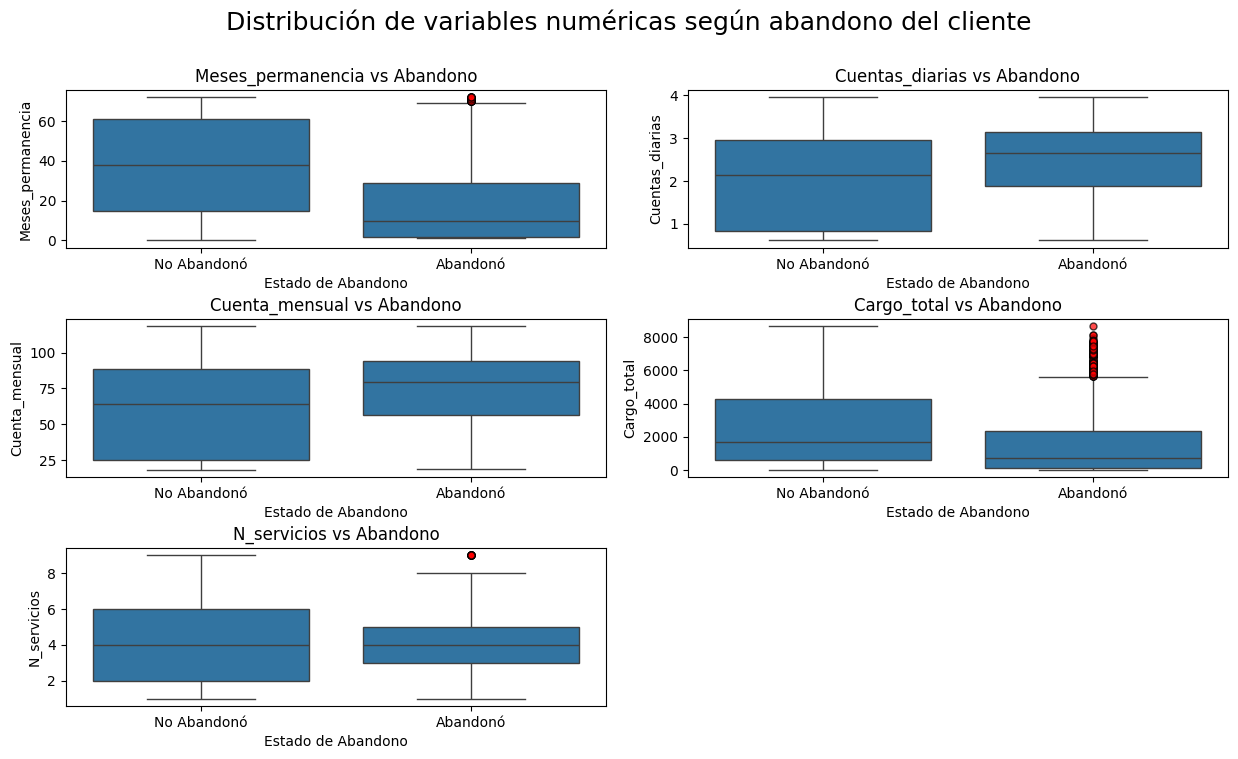

In [50]:
fig, ax = plt.subplots(3,2, figsize=(15,8))
fig.suptitle('Distribución de variables numéricas según abandono del cliente', fontsize=18)
fig.subplots_adjust(wspace=0.15, hspace=0.45)
columnas_numericas = ['Meses_permanencia', 'Cuentas_diarias', 'Cuenta_mensual', 'Cargo_total', 'N_servicios']

ax = ax.flatten()

for i, col in enumerate(columnas_numericas):
  sns.boxplot(data=df, x='Abandono', y=col, ax=ax[i], flierprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=5, alpha=0.7))
  ax[i].set_title(f'{col} vs Abandono')
  ax[i].set_xlabel('Estado de Abandono')
  ax[i].set_xticks([0,1])
  ax[i].set_xticklabels(['No Abandonó', 'Abandonó'])

fig.delaxes(ax[-1])
plt.show()



### Tabla resumen por columnas númericas

### Clientes que continúan en la empresa

In [51]:
df.loc[df['Abandono'] == 0, columnas_numericas].describe()

,Meses_permanencia,Cuentas_diarias,Cuenta_mensual,Cargo_total,N_servicios
count,5174.000000,5174.000000,5174.000000,5174.000000,5174.0
mean,37.569965,2.042171,61.265124,2549.999497,4.173174
std,24.113777,1.036422,31.092648,2329.858843,2.461018
min,0.000000,0.608333,18.250000,18.800000,1.0
25%,15.000000,0.836667,25.100000,572.900000,2.0
50%,38.000000,2.147500,64.425000,1679.525000,4.0
75%,61.000000,2.946667,88.400000,4262.850000,6.0
max,72.000000,3.958333,118.750000,8672.450000,9.0


### Clientes que abandonaron la empresa

In [52]:
df.loc[df['Abandono'] == 1, columnas_numericas].describe()

,Meses_permanencia,Cuentas_diarias,Cuenta_mensual,Cargo_total,N_servicios
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.0
mean,17.979133,2.481378,74.441332,1531.796094,4.071696
std,19.531123,0.822202,24.666053,1890.822994,1.839431
min,1.000000,0.628333,18.850000,18.850000,1.0
25%,2.000000,1.871667,56.150000,134.500000,3.0
50%,10.000000,2.655000,79.650000,703.550000,4.0
75%,29.000000,3.140000,94.200000,2331.300000,5.0
max,72.000000,3.945000,118.350000,8684.800000,9.0


## Analisis Outliers Cargo_total vs Abandono

In [53]:
df_cliente_abandono= df[df['Abandono'] == 1]
df_cliente_abandono.head(2)

,Cliente_ID,Abandono,Genero,Ciudadano_mayor,Pareja,Dependientes,Meses_permanencia,Servicio_telefonico,Varias_lineas,Servicio_internet,Tipo_servicio_internet,Seguridad_en_linea,Copia_seguridad_en_linea,Proteccion_dispositivo,Soporte_tecnico,Televisión_por_cable,Streaming_peliculas,Tipo_contrato,Factura_en_linea,Forma_pago,Cuentas_diarias,Cuenta_mensual,Cargo_total,N_servicios
2,0004-TLHLJ,1,0,0,0,0,4,1,0,1,fiber optic,0,0,1,0,0,0,month-to-month,1,electronic check,2.463333,73.9,280.85,3
3,0011-IGKFF,1,0,1,1,0,13,1,0,1,fiber optic,0,1,1,0,1,1,month-to-month,1,electronic check,3.266667,98.0,1237.85,6


In [54]:
Q1 = df_cliente_abandono['Cargo_total'].quantile(0.25)
Q3 = df_cliente_abandono['Cargo_total'].quantile(0.75)
IQR = Q3 - Q1

limite_superior = Q3 + 1.5 * IQR


In [55]:
outliers_cargo_total = df_cliente_abandono[df_cliente_abandono['Cargo_total'] > limite_superior]

In [56]:
cantidad_outliers = len(outliers_cargo_total)
cantidad_outliers

109

In [57]:
resto_cargo_total = df_cliente_abandono[df_cliente_abandono['Cargo_total'] <= limite_superior]
cantidad_no_outliers = len(resto_cargo_total)
cantidad_no_outliers

1760

In [58]:
comparacion_cargo_total = pd.DataFrame({
    'Outliers (%)' : outliers_cargo_total[columnas_numericas].mean(),
    'Resto (%)' : resto_cargo_total[columnas_numericas].mean()
})

estilo_comparacion_cargo_total = comparacion_cargo_total.T.style.format({
    'Meses_permanencia' : '{:,.0f}',
    'N_servicios' : '{:,.0f}',
    'Cuentas_diarias' : '{:,.2f}',
    'Cuenta_mensual' : '{:,.2f}',
    'Cargo_total': '{:,.2f}'})
estilo_comparacion_cargo_total

,Meses_permanencia,Cuentas_diarias,Cuenta_mensual,Cargo_total,N_servicios
Outliers (%),64,3.47,104.15,"6,670.28",7
Resto (%),15,2.42,72.60,"1,213.56",4


## Matriz de correlación entre las variables

In [59]:
df_corr_col_numericas = df.corr(numeric_only=True)

In [60]:
mascara = np.triu(np.ones_like(df_corr_col_numericas, dtype=bool))

mascara_col_restantes = np.ones_like(df_corr_col_numericas, dtype=bool)
mascara_col_restantes[:,0] = False

mascara_final = mascara | mascara_col_restantes

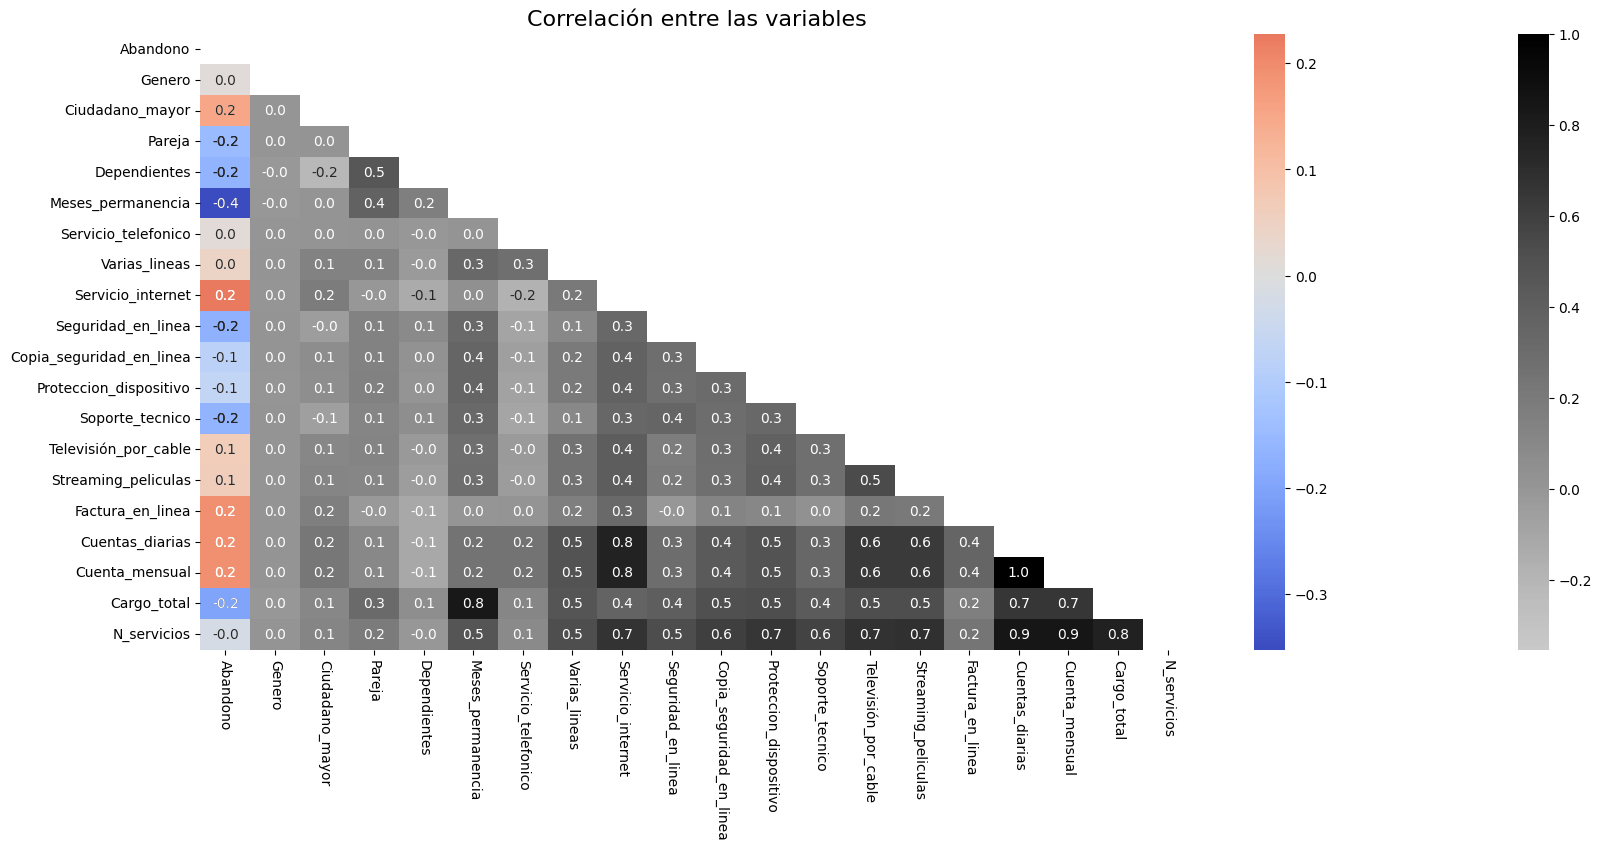

In [61]:
plt.figure(figsize=(20,8))
plt.title('Correlación entre las variables', fontsize=16)
sns.heatmap(data=df_corr_col_numericas, mask=mascara, cmap='Greys', annot=True, fmt='.1f', center=0)

sns.heatmap(data=df_corr_col_numericas, mask=mascara_final, cmap='coolwarm', annot=True, fmt='.1f', center=0)

plt.xticks(rotation=-90)
plt.show()

plt.show()


## Perfil del cliente que abandonó la empresa



### Distribución por variables categóricas:

In [62]:
descripcion_abandono_cat = []
for col in lista_columnas_categoricas:
  tabla = df_cliente_abandono[col].value_counts(normalize=True).mul(100).reset_index()
  tabla.columns = ['valor', '% de clientes']
  tabla.insert(0, 'categoria', col)
  descripcion_abandono_cat.append(tabla)

descripcion_general_abandono_cat = pd.concat(descripcion_abandono_cat, ignore_index=True)
descripcion_general_abandono_cat.loc[descripcion_general_abandono_cat['categoria'] == 'Genero', 'valor'] = descripcion_general_abandono_cat.loc[descripcion_general_abandono_cat['categoria'] == 'Genero', 'valor'].replace({0:'Male', 1:'Female'})
descripcion_general_abandono_cat['valor'] = descripcion_general_abandono_cat['valor'].replace({0 : 'No', 1 : 'Si'})
descripcion_general_abandono_cat.style.format({'% de clientes' : '{:.2f}%'}).hide(axis='index').highlight_between(left=55, right=100, subset=['% de clientes'], color='Red')



categoria,valor,% de clientes
Genero,Female,50.24%
Genero,Male,49.76%
Ciudadano_mayor,No,74.53%
Ciudadano_mayor,Si,25.47%
Pareja,No,64.21%
Pareja,Si,35.79%
Dependientes,No,82.56%
Dependientes,Si,17.44%
Tipo_servicio_internet,fiber optic,69.40%
Tipo_servicio_internet,dsl,24.56%


### Distribución de servicios contratados:

In [63]:
descripcion_abandono_servicio = []
for col in col_servicios:
  tabla = df_cliente_abandono[col].value_counts(normalize=True).mul(100).reset_index()
  tabla.columns = ['valor', '% de clientes']
  tabla.insert(0, 'categoria', col)
  descripcion_abandono_servicio.append(tabla)

descripcion_general_abandono_serv = pd.concat(descripcion_abandono_servicio, ignore_index=True)
descripcion_general_abandono_serv['valor'] = descripcion_general_abandono_serv['valor'].astype('object').replace({0 : 'No', 1 : 'Si'})

descripcion_general_abandono_serv['valor'] = pd.Categorical(descripcion_general_abandono_serv['valor'], categories=['Si', 'No'], ordered=True)
descripcion_general_abandono_serv = descripcion_general_abandono_serv.sort_values(['categoria', 'valor'])
descripcion_general_abandono_serv.style.format({'% de clientes' : '{:.2f}%'}).hide(axis='index').highlight_between(left=70, right=100, subset=['% de clientes'], color='Red')


categoria,valor,% de clientes
Copia_seguridad_en_linea,Si,27.98%
Copia_seguridad_en_linea,No,72.02%
Proteccion_dispositivo,Si,29.16%
Proteccion_dispositivo,No,70.84%
Seguridad_en_linea,Si,15.78%
Seguridad_en_linea,No,84.22%
Servicio_internet,Si,93.95%
Servicio_internet,No,6.05%
Servicio_telefonico,Si,90.90%
Servicio_telefonico,No,9.10%


### Distribución de variables numéricas:

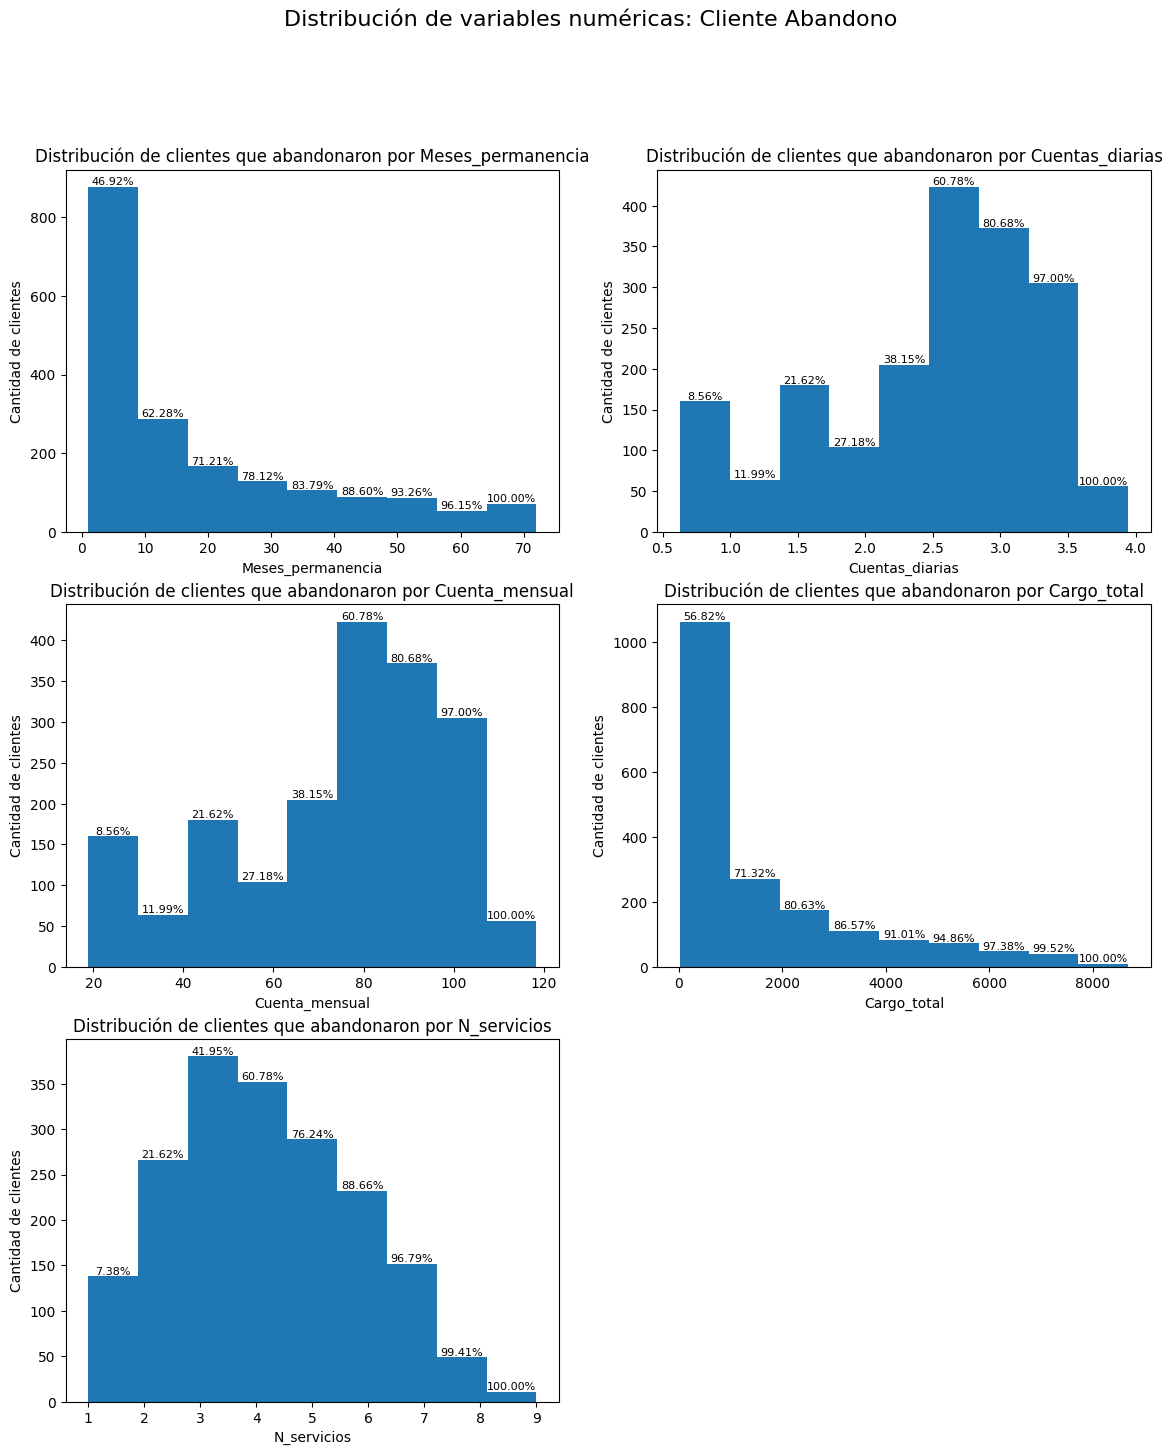

In [64]:
fig, ax = plt.subplots(3,2, figsize=(14,16))
fig.subplots_adjust(hspace=0.2)
fig.suptitle('Distribución de variables numéricas: Cliente Abandono', fontsize=16)
ax = ax.flatten()
for i,col in enumerate(columnas_numericas):
  counts, bins, patches = ax[i].hist(
    df_cliente_abandono[col],
    bins=9)

  ax[i].set_title(f'Distribución de clientes que abandonaron por {col}')
  ax[i].set_xlabel(f'{col}')
  ax[i].set_ylabel('Cantidad de clientes')

  count_suma = 0
  for count, patch in zip(counts, patches):
    count_suma += count
    if count > 0:
      ax[i].text(
          patch.get_x() + patch.get_width() / 2,
          count,
          f'{count_suma/len(df_cliente_abandono) * 100:.2f}%',
          ha='center',
          va='bottom',
          fontsize=8
      )

fig.delaxes(ax[-1])
plt.show()



## Perfil del cliente que continúa en la empresa

### Distribución por variables categóricas:

In [65]:
df_cliente_no_abandono = df[df['Abandono'] == 0]

In [66]:
descrip_no_abandono_cat = []
for col in lista_columnas_categoricas:
  tabla = df_cliente_no_abandono[col].value_counts(normalize=True).mul(100).reset_index()
  tabla.columns = ['valor', '% de clientes']
  tabla.insert(0, 'categoria', col)
  descrip_no_abandono_cat.append(tabla)

descripcion_general_no_abandono_cat = pd.concat(descrip_no_abandono_cat, ignore_index=True)
descripcion_general_no_abandono_cat.loc[descripcion_general_no_abandono_cat['categoria'] == 'Genero', 'valor'] = descripcion_general_no_abandono_cat.loc[descripcion_general_no_abandono_cat['categoria'] == 'Genero', 'valor'].replace({0:'Male', 1:'Female'})
descripcion_general_no_abandono_cat['valor'] = descripcion_general_no_abandono_cat['valor'].replace({0 : 'No', 1 : 'Si'})
descripcion_general_no_abandono_cat.style.format({'% de clientes' : '{:.2f}%'}).hide(axis='index').highlight_between(left=55, right=100, subset=['% de clientes'], color='Red')


categoria,valor,% de clientes
Genero,Male,50.73%
Genero,Female,49.27%
Ciudadano_mayor,No,87.13%
Ciudadano_mayor,Si,12.87%
Pareja,Si,52.82%
Pareja,No,47.18%
Dependientes,No,65.52%
Dependientes,Si,34.48%
Tipo_servicio_internet,dsl,37.92%
Tipo_servicio_internet,fiber optic,34.77%


### Distribución por servicios contratados:

In [67]:
descrip_no_abandono_serv = []
for col in col_servicios:
  tabla = df_cliente_no_abandono[col].value_counts(normalize=True).mul(100).reset_index()
  tabla.columns = ['valor', '% de clientes']
  tabla.insert(0, 'categoria', col)
  descrip_no_abandono_serv.append(tabla)

descrip_general_no_abandono_serv = pd.concat(descrip_no_abandono_serv, ignore_index=True)
descrip_general_no_abandono_serv['valor'] = descrip_general_no_abandono_serv['valor'].astype('object').replace({0 : 'No', 1 : 'Si'})

descrip_general_no_abandono_serv['valor'] = pd.Categorical(descrip_general_no_abandono_serv['valor'], categories=['Si', 'No'], ordered=True)
descrip_general_no_abandono_serv = descrip_general_no_abandono_serv.sort_values(['categoria', 'valor'])
descrip_general_no_abandono_serv.style.format({'% de clientes' : '{:.2f}%'}).hide(axis='index').highlight_between(left=70, right=100, subset=['% de clientes'], color='Red')

categoria,valor,% de clientes
Copia_seguridad_en_linea,Si,36.84%
Copia_seguridad_en_linea,No,63.16%
Proteccion_dispositivo,Si,36.28%
Proteccion_dispositivo,No,63.72%
Seguridad_en_linea,Si,33.32%
Seguridad_en_linea,No,66.68%
Servicio_internet,Si,72.69%
Servicio_internet,No,27.31%
Servicio_telefonico,Si,90.10%
Servicio_telefonico,No,9.90%


### Distribución por variables numéricas:

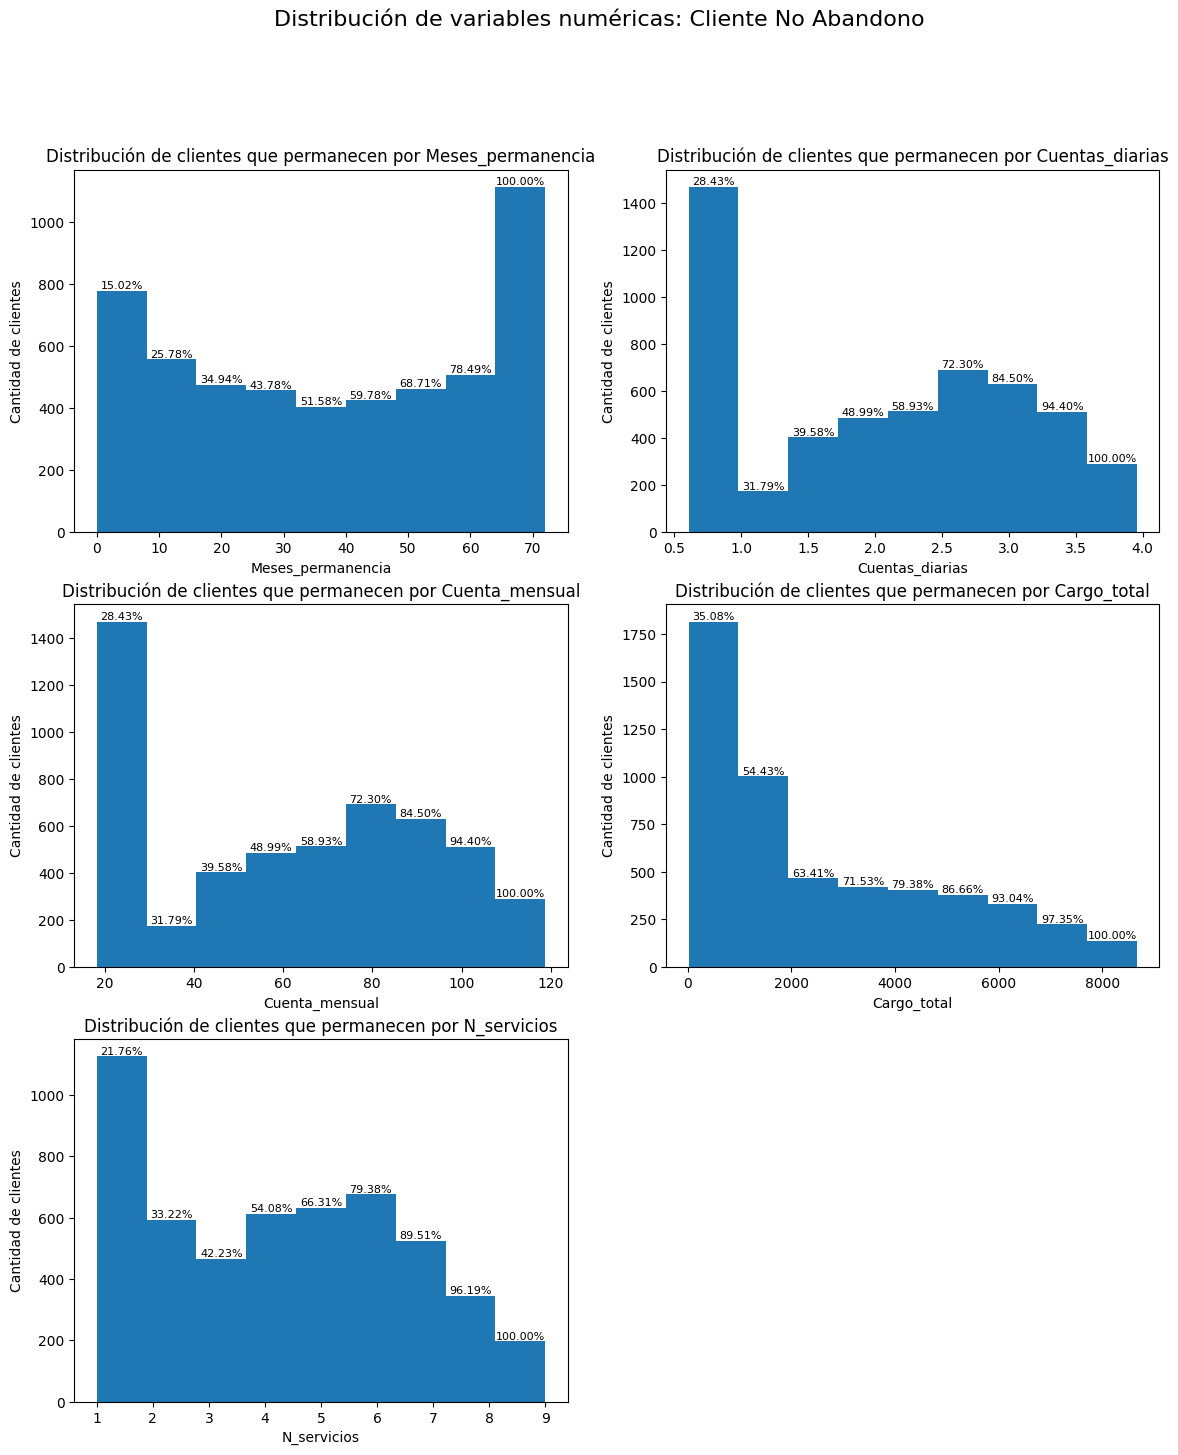

In [68]:
fig, ax = plt.subplots(3,2, figsize=(14,16))
fig.subplots_adjust(hspace=0.2)
fig.suptitle('Distribución de variables numéricas: Cliente No Abandono', fontsize=16)
ax = ax.flatten()
for i,col in enumerate(columnas_numericas):
  counts, bins, patches = ax[i].hist(
    df_cliente_no_abandono[col],
    bins=9)

  ax[i].set_title(f'Distribución de clientes que permanecen por {col}')
  ax[i].set_xlabel(f'{col}')
  ax[i].set_ylabel('Cantidad de clientes')

  suma_count = 0
  for count, patch in zip(counts, patches):
    suma_count +=count
    if count > 0:
      ax[i].text(
          patch.get_x() + patch.get_width() / 2,
          count,
          f'{suma_count / len(df_cliente_no_abandono) * 100:.2f}%',
          ha='center',
          va='bottom',
          fontsize=8
      )

fig.delaxes(ax[-1])
plt.show()


##Comparación de variables entre clientes que continúan y abandonaron la empresa

### Mediana del cargo mensual según meses de permanencia

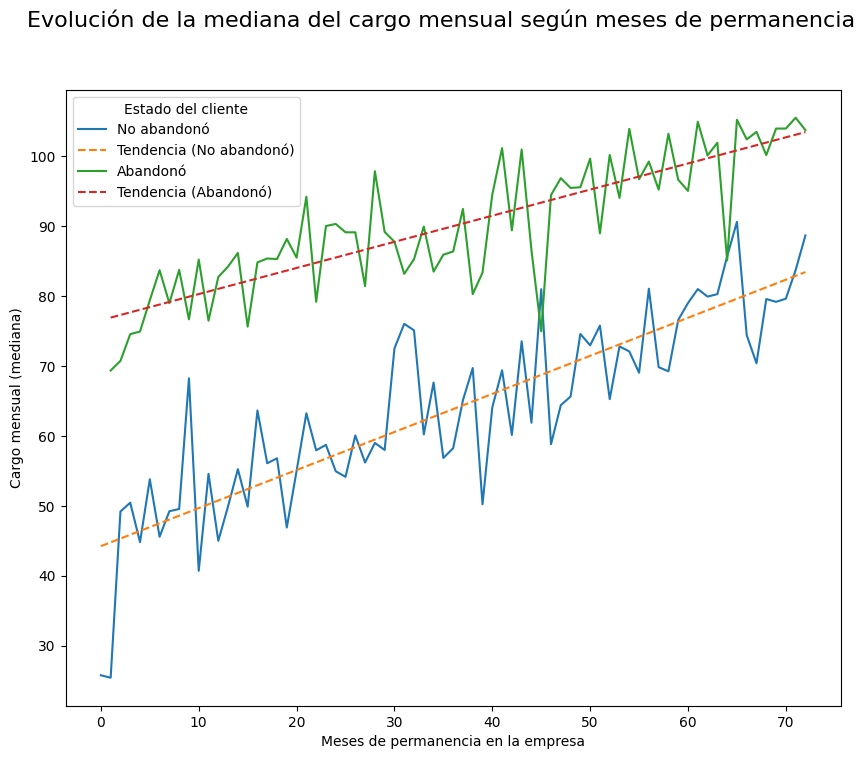

In [69]:
evolucion= df.groupby(['Meses_permanencia','Abandono'])['Cuenta_mensual'].median().reset_index()

fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('Evolución de la mediana del cargo mensual según meses de permanencia', fontsize=16)

for abandono, data in evolucion.groupby('Abandono'):
  ax.plot(data['Meses_permanencia'], data['Cuenta_mensual'], label= 'No abandonó' if abandono == 0 else 'Abandonó')

  coef = np.polyfit(data['Meses_permanencia'], data['Cuenta_mensual'], 1)
  tendecia = np.poly1d(coef)
  ax.plot(data['Meses_permanencia'], tendecia(data['Meses_permanencia']), linestyle='--', label=f'Tendencia ({'No abandonó' if abandono == 0 else 'Abandonó'})')

ax.set_xlabel('Meses de permanencia en la empresa')
ax.set_ylabel('Cargo mensual (mediana)')
ax.legend(title='Estado del cliente')
plt.show()


### Mediana del número de servicios contratados según meses de permanencia

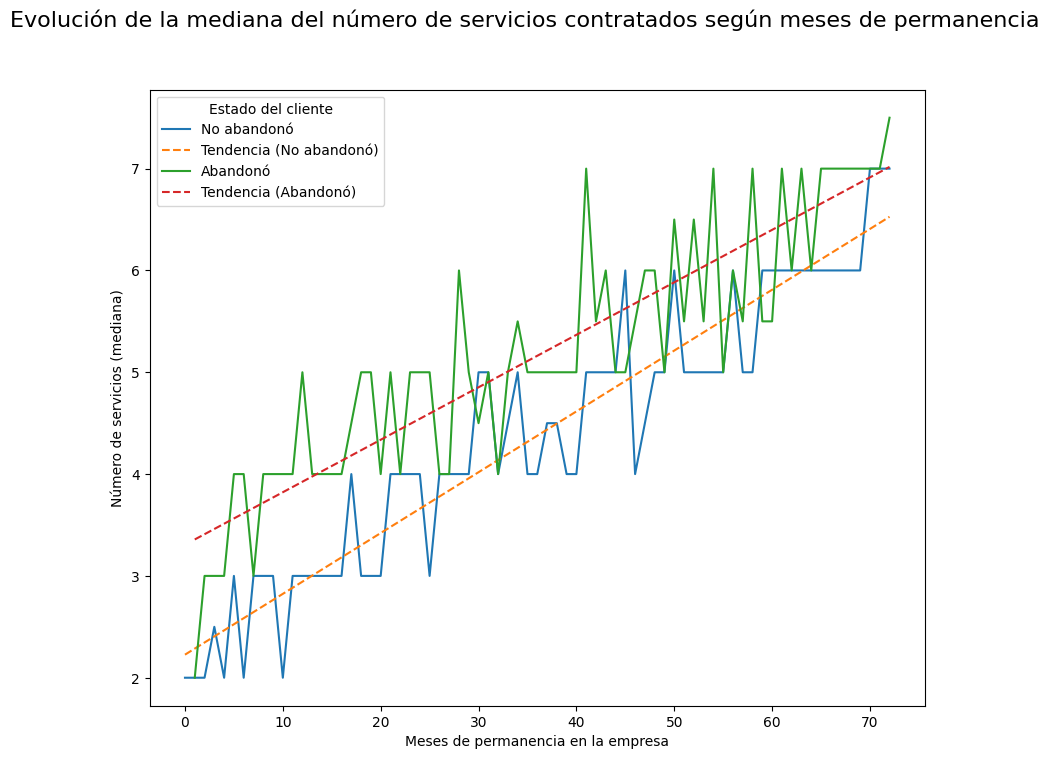

In [70]:
evolucion_num_servicios = df.groupby(['Meses_permanencia','Abandono'])['N_servicios'].median().reset_index()

fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('Evolución de la mediana del número de servicios contratados según meses de permanencia', fontsize=16)

for abandono, data in evolucion_num_servicios.groupby('Abandono'):
  ax.plot(data['Meses_permanencia'], data['N_servicios'], label= 'No abandonó' if abandono == 0 else 'Abandonó')

  coef = np.polyfit(data['Meses_permanencia'], data['N_servicios'], 1)
  tendecia = np.poly1d(coef)
  ax.plot(data['Meses_permanencia'], tendecia(data['Meses_permanencia']), linestyle='--', label=f'Tendencia ({'No abandonó' if abandono == 0 else 'Abandonó'})')

ax.set_xlabel('Meses de permanencia en la empresa')
ax.set_ylabel('Número de servicios (mediana)')
ax.legend(title='Estado del cliente')
plt.show()


#📄Informe final

## Introducción

En el contexto de una elevada tasa de cancelación, el presente análisis busca identificar y comprender los factores asociados a la pérdida de clientes. Considerando que la empresa ha perdido el 26,54 % de su masa de clientes, se analizarán distintos factores demográficos, categóricos y numéricos con el objetivo de identificar patrones que expliquen dicho comportamiento.

## Limpieza y tratamiento de datos

En primera instancia, se importó el dataset en formato JSON utilizando la librería **Pandas**, y se almacenó en la variable df. Luego, con el objetivo de facilitar su lectura y análisis, se normalizaron las columnas que contenían diccionarios mediante el método **json_normalize**.

Posteriormente, se ajustaron los tipos de datos de las columnas, se renombraron y se convirtieron los valores textuales a minúsculas utilizando el método **lower()**, con el fin de lograr una interpretación más consistente.

Además, se aplicaron distintos criterios para el tratamiento de los datos faltantes y, mediante el método **any()**, se verificó la existencia de registros duplicados en el DataFrame.

Por último, se consideró conveniente convertir las columnas con valores textuales “no” y “si” a variables binarias (0 y 1, respectivamente), por lo que se realizó dicha transformación.



## Análisis Exploratorio de datos

Como primer paso, se aplicó el método **describe()** a las columnas numéricas del DataFrame con el objetivo de obtener un panorama general de la distribución de los datos. Asimismo, mediante un gráfico de torta se visualizó la proporción de clientes que continúan en la empresa y aquellos que la abandonaron.

![link text](https://drive.google.com/uc?id=1TqO3QOqGU4I6AKO1GL9jM04T2DR2qFEY)

Luego, se calcularon y visualizaron, mediante gráficos de barras, las tasas de abandono según dos categorías de variables: variables categóricas y variables asociadas a los servicios contratados. Adicionalmente, se presentaron tablas resumen que incluyen la cantidad de clientes en cada categoría, con el fin de dimensionar su impacto sobre la masa total de clientes.

![link text](https://drive.google.com/uc?id=1D_C1aMmDTLNmTUsBSBt2qrbt2nRA1mz2)

Las variables numéricas fueron analizadas a través de gráficos de caja (boxplots), y se aplicó nuevamente el método **describe()** para comprender su comportamiento en función de la permanencia o abandono del cliente.

![link text](https://drive.google.com/uc?id=1tkLhMOukvFkah1Zs3WknuPTtM1KCyMPO)

Como complemento al análisis mediante boxplots, se estudiaron los valores atípicos (outliers) surgidos del cruce entre los clientes que abandonaron la empresa y el cargo total acumulado durante su permanencia, comparándolos con el resto de los clientes que también abandonaron la empresa.

A continuación, se desarrolló una matriz de correlación, poniendo especial énfasis en las correlaciones entre la variable “Abandono” y el resto de las variables binarias y numéricas.

![link text](https://drive.google.com/uc?id=1_xYJcHf2L6uFpoOssQZNZpQ2aDH4qJP9)

Resultó de interés analizar el perfil del cliente que continúa en la empresa en contraste con aquel que discontinuó los servicios. Para ello, mediante distintas tablas, se identificaron las características demográficas predominantes, los servicios y tipos de servicios contratados, así como los tipos de contrato y formas de pago en cada grupo.

A este análisis se sumó el estudio de la proporción de clientes en cada grupo según los meses de permanencia, el número de servicios contratados, el gasto mensual y el gasto total acumulado durante el vínculo comercial.

![link text](https://drive.google.com/uc?id=1hgXyd4ysY_GRRz4qNMe1By2ZDCw2jLty)

![link text](https://drive.google.com/uc?id=18cOu4a4bVr8So-E0-ly5JAtb2vyWLd_f)

Finalmente, se realizó una comparación adicional entre los clientes que continúan y aquellos que abandonaron la empresa mediante dos gráficos de líneas. Estos representan la evolución de la mediana del cargo mensual y la mediana del número de servicios contratados en función de los meses de permanencia. En ambos casos, se incluyeron líneas de tendencia como herramienta complementaria para facilitar la comparación.

![link text](https://drive.google.com/uc?id=1IjtmQq_VKU9EWh0PcaWkgnl3tCtnh4HT)

![link text](https://drive.google.com/uc?id=16UTuFoXTqZZMS0l7dp80K-4TUs9XSzDv)

## Conclusiones e Insights

### Análisis de las variables categóricas


En relación con el tipo de servicio de internet, los clientes que contratan fibra óptica presentan una tasa de abandono del 42%, muy superior al 19% observado en aquellos que optan por DSL. En otras palabras, los clientes que contratan fibra óptica tienen más del doble de probabilidad de abandonar la empresa que quienes eligen DSL.

Este resultado permite identificar a la fibra óptica como un segmento de alto riesgo, compuesto por clientes más exigentes, sensibles a problemas de calidad del servicio y a precios más elevados.

Respecto al tipo de contrato, se observan patrones altamente significativos. Los clientes con contratos mes a mes presentan una tasa de abandono del 42%, frente al 11% de los contratos a 1 año y aproximadamente 3% en los contratos a 2 años. Es decir, los clientes con modalidad mes a mes tienen casi 3 veces más probabilidad de abandonar que aquellos con contratos a un año y 14 veces más que quienes firman contratos a dos años.

Estos resultados sugieren que los contratos de mayor duración funcionan como una barrera de salida.

En cuanto a la forma de pago, los clientes que abonan mediante E-cheq presentan la mayor tasa de abandono (45%), en comparación con 19% en mailed check, 17% en transferencia bancaria y 15% en tarjeta de crédito. Esto indica que los clientes que utilizan E-cheq tienen más del doble de riesgo de abandono que aquellos que emplean medios de pago más automatizados.

Por el lado del análisis demográfico del total de clientes se desprende que:
* Solo el 16% de los clientes tiene 65 años o más.
Al comparar tasas de abandono, se observa que un cliente mayor de 65 años tiene un 77% más de probabilidad de abandonar que uno que no lo es.

Por lo tanto, aunque este grupo representa una proporción reducida de la base total de clientes, presenta una tasa de abandono significativamente más alta, lo que lo convierte en un segmento de alto riesgo individual, aunque no explique la mayor parte de las bajas totales.

En conjunto, estos hallazgos confirman que el abandono se concentra en clientes con bajo compromiso contractual y formas de pago no automáticas.

![link text](https://drive.google.com/uc?id=1vdwESM-Fg8VxXeHbNFWXLz5cH9P9jX_5)

### Análisis de servicios

Del análisis de los servicios contratados se concluye que:

* El servicio más contratado es el servicio telefónico, presente en el 90% de los clientes.

* El segundo servicio más contratado es el servicio de internet, con una adopción del 78%.

* Ningún otro servicio supera el 60% de adopción.

Al analizar las tasas de abandono, los clientes que contratan el servicio de internet tienen 3 veces más probabilidad de abandonar en comparación con quienes no lo contratan.

Por otro lado, los clientes que contratan Seguridad en línea o Soporte técnico presentan un 50% menos de riesgo de abandono respecto de aquellos que no lo hacen, lo que sugiere que estos servicios actúan como factores de retención.

En consecuencia, el servicio de internet aparece como un producto con alta sensibilidad a precio, competencia o calidad, mientras que los servicios de soporte y seguridad funcionan como barreras de salida, especialmente en las primeras etapas de la relación con el cliente.

![link text](https://drive.google.com/uc?id=1bYS3cCqBd7coSvWo0TU6Yj0dm3hhUrL_)





### Análisis del tiempo de permanencia

El promedio de permanencia del total de clientes es de 32 meses, mientras que la mediana es de 29 meses, lo que indica la presencia de clientes muy antiguos que elevan el promedio. En este contexto, la mediana resulta un indicador más representativo.

Al analizar exclusivamente a los clientes que abandonaron la empresa, se observa que el abandono ocurre de manera temprana. La mediana de permanencia de los clientes que continúan es de 38 meses, frente a solo 10 meses en los clientes que abandonaron. Asimismo, más del 70% de los clientes que abandonan lo hacen antes del mes 29.

Además, se obtuvo una correlación de -0,4 entre la permanencia y el abandono, considerada de moderada a fuerte, lo que indica que a mayor permanencia, menor probabilidad de abandono.

En síntesis, el abandono se concentra en las etapas iniciales de la relación, mientras que los clientes que superan aproximadamente los 30 meses presentan una probabilidad significativamente menor de abandonar.

### Análisis de cargos a los clientes

El análisis de la distribución del cargo mensual muestra que los clientes que abandonaron la empresa pagan montos más elevados que aquellos que continúan. Por ejemplo, el percentil 25 de los clientes que abandonan es de \$56,15, frente a \$25,10 en los clientes que permanecen.

En contraste, al analizar el cargo total acumulado, la mediana de los clientes que continúan es de \$1.679,53, mientras que en los clientes que abandonan es de \$703,55. Esto indica que los clientes que abandonan gastan menos en total, no porque paguen menos por mes, sino porque permanecen menos tiempo.

En cuanto al número de servicios contratados, no se observan diferencias significativas entre ambos grupos, lo que sugiere que la cantidad de servicios no es un factor determinante, siendo más relevante el tipo de servicio contratado.

### Perfil del cliente que abandona la empresa

Los clientes que abandonan la empresa se caracterizan por:

* Predominio del contrato mes a mes (88%) y del pago mediante E-cheq (57,3%), lo que refleja bajo compromiso contractual.

* Alta adopción del servicio de internet (94%), con fuerte preferencia por fibra óptica (73%).

* Muy baja contratación de servicios complementarios:

    * 84% no contrata Seguridad en línea

    * 83% no contrata Soporte técnico

    * 72% no contrata Copia de seguridad

    * 71% no contrata Protección de dispositivo

En resumen, se trata de clientes con servicio de internet (principalmente fibra), contratos de corta duración, medios de pago poco automatizados y escasa adopción de servicios adicionales que funcionen como barreras de salida.

### Perfil del cliente que continúa en la empresa

En contraste, los clientes que permanecen en la empresa presentan:

* Mayor proporción de contratos a plazo (1 y 2 años), que representan el 57%, frente al 43% de la modalidad mes a mes.

* Alta adopción del servicio de internet (73%), con una distribución más equilibrada entre DSL (53%) y fibra óptica (47%).

* Mayor contratación relativa de servicios complementarios.

* Uso más frecuente de medios de pago automatizados (50%).

En síntesis, se trata de clientes con mayor estabilidad contractual, menor concentración en fibra óptica, mayor adopción de servicios adicionales y formas de pago más automatizadas.

## Recomendaciones:

Dado que el abandono de clientes no responde a un único factor, sino a una combinación de bajo compromiso contractual, baja permanencia, medios de pago no automatizados, altas expectativas de servicio y ausencia de servicios de soporte, las acciones de retención deben enfocarse principalmente en los primeros meses de la relación comercial, especialmente en clientes con contratos flexibles y servicios de alta exigencia como la fibra óptica.

En función de los resultados obtenidos, se proponen las siguientes recomendaciones:

* Implementar un programa de retencion temprana (0 - 6 meses):

  Diseñar un programa que contemple llamadas proactivas, chequeos de calidad del servicio y beneficios exclusivos iniciales, con el objetivo de que el cliente supere la zona crítica de permanencia. Este programa debería focalizarse especialmente en clientes con contratos mes a mes, servicio de fibra óptica y formas de pago no automatizadas.

* Reducir la exposición al contrato mes a mes:

  Incentivar la migración hacia contratos a plazo mediante descuentos exclusivos y paquetes con servicios adicionales bonificados, generando barreras de salida amigables sin afectar la percepción del cliente.

* Convertir la fibra optica en un servicio acompañado:

  Integrar la fibra óptica con servicios complementarios, como soporte técnico o seguridad en línea, con el fin de mejorar la experiencia del usuario y brindar un seguimiento técnico más intensivo, acorde a las expectativas de este segmento.

* Aumentar el compromiso a través de la forma de pago:

  Promover la adopción de medios de pago automatizados mediante descuentos, beneficios exclusivos o promociones especiales, reduciendo la fricción operativa y desincentivando el abandono.

* Enfocar las estrategias comerciales en la calidad del servicio:

  Orientar las estrategias de venta menos hacia la cantidad de servicios contratados y más hacia la calidad y el valor agregado de los mismos, promoviendo activamente los servicios complementarios como elementos clave de retención.

  